In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [85]:
# ejercicio 1 y 2 (Arbol de decision y KNN o Vecino mas cercano)

In [90]:
# ejercicio 1 Arbol de desicion

In [2]:
df = pd.read_csv('Raw-Data.csv')

In [3]:
df = pd.read_csv('Raw-Data.csv')

In [4]:
df = pd.read_csv("Cleaned-Data.csv")
df

Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0                  0      1                 1           1         1  ...   
1                  0      1                 1           1         1  ...   
2                  0      1                 1           1         1  ...   
3                  0      1                 1           1         1  ...   
4                  0      1                 1           1         1  ...   
...              ...    ...               ...         ...       ...  ...   
316795             1      0                 0           0         0  ...   
316796             1      0                 0           0         0  ...   
316797             1      0                 0           0         0  ...   
316798             1      0                 0           0         0  ...   
316799             1      0                 0           0         0  ...   

        Gender_Male  Gender_Transgender  Severity_Mild  Severity_Moderate  \
0                 1                   0              1                  0   
1                 1                   0              1                  0   
2                 1                   0              1                  0   
3                 1                   0              0                  1   
4                 1                   0              0                  1   
...             ...                 ...            ...                ...   
316795            0                   1              0                  0   
316796            0                   1              0                  0   
316797            0                   1              0                  0   
316798            0                   1              0                  0   
316799            0                   1              0                  0   

        Severity_None  Severity_Severe  Contact_Dont-Know  Contact_No  \
0                   0                0                  0           0   
1                   0                0                  0           1   
2                   0                0                  1           0   
3                   0                0                  0           0   
4                   0                0                  0           1   
...               ...              ...                ...         ...   
316795              0                1                  0           1   
316796              0                1                  1           0   
316797              1                0                  0           0   
316798              1                0                  0           1   
316799              1                0                  1           0   

        Contact_Yes  Country  
0                 1    China  
1                 0    China  
2                 0    China  
3                 1    China  
4                 0    China  
...             ...      ...  
316795            0    Other  
316796            0    Other  
316797            1    Other  
316798            0    Other  
316799            0    Othe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

<AxesSubplot:>

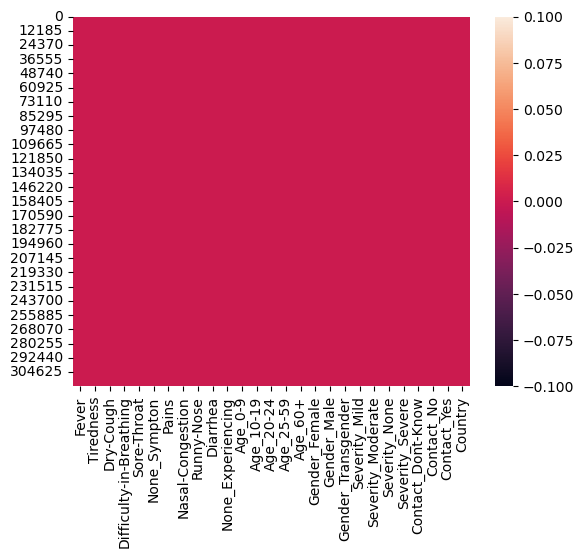

In [12]:
sns.heatmap(df.isnull())

In [13]:
null = df.isnull().sum()

In [16]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea',
       'Age_60+', 'Severity_Severe'],
      dtype='object')

In [15]:
df.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'Severity_Mild', 
         'Severity_Moderate', 'Severity_None', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
         'Age_20-24', 'Age_25-59', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'None_Sympton'],
        axis = 1, inplace = True)
df

Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        Pains  Nasal-Congestion  Runny-Nose  Diarrhea  Age_60+  \
0           1                 1           1         1        0   
1           1                 1           1         1        0   
2           1                 1           1         1        0   
3           1                 1           1         1        0   
4           1                 1           1         1        0   
...       ...               ...         ...       ...      ...   
316795      0                 0           0         0        1   
316796      0                 0           0         0        1   
316797      0                 0           0         0        1   
316798      0                 0           0         0        1   
316799      0                 0           0         0        1   

        Severity_Severe  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
316795                1  
316796                1  
316797                0  
316798                0  
316799                0  

[316800 rows x 11 columns]

array([[<AxesSubplot:title={'center':'Fever'}>,
        <AxesSubplot:title={'center':'Tiredness'}>,
        <AxesSubplot:title={'center':'Dry-Cough'}>],
       [<AxesSubplot:title={'center':'Difficulty-in-Breathing'}>,
        <AxesSubplot:title={'center':'Sore-Throat'}>,
        <AxesSubplot:title={'center':'Pains'}>],
       [<AxesSubplot:title={'center':'Nasal-Congestion'}>,
        <AxesSubplot:title={'center':'Runny-Nose'}>,
        <AxesSubplot:title={'center':'Diarrhea'}>],
       [<AxesSubplot:title={'center':'Age_60+'}>,
        <AxesSubplot:title={'center':'Severity_Severe'}>, <AxesSubplot:>]],
      dtype=object)

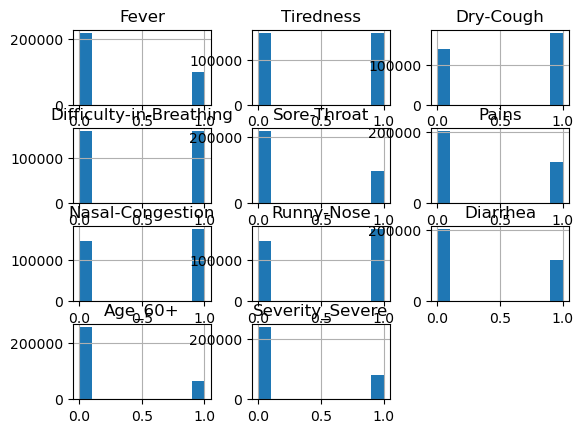

In [17]:
df.hist()

In [18]:
# Train & Test Splitting The Data (Entrene y pruebe la división de datos)

In [19]:
train, test = train_test_split(df, test_size = 0.3, random_state=0)

In [20]:
pred = test.copy()

In [21]:
x_train = train.iloc[:, :19].values
x_test = test.iloc[:, :19].values

In [22]:
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

In [23]:
# Function to Measure Performance (Función para medir el rendimiento)

In [24]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

In [26]:
# Logistic Regression(Regresión logística)

In [27]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [28]:
y_pred_lr = model_lr.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



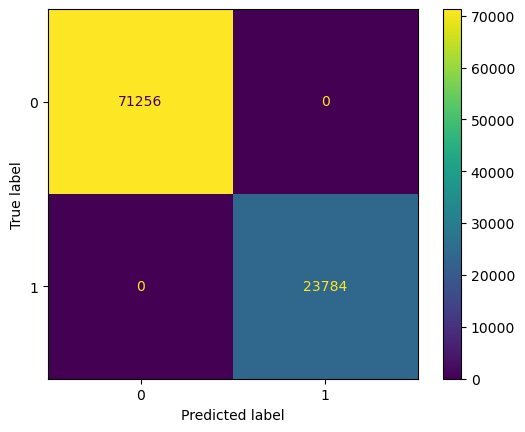

In [29]:
perform(y_pred_lr)

In [30]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



In [31]:
pred['prediction'] = y_pred_lr
pred

Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
285440      1          1          1                        0            0   
61174       0          0          0                        0            0   
111620      0          0          0                        1            0   
44926       1          0          0                        0            0   
192227      1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
417         1          1          0                        0            0   
66946       0          0          1                        0            0   
58871       0          0          0                        1            0   
92223       0          0          1                        1            0   
36724       0          1          1                        1            0   

        Pains  Nasal-Congestion  Runny-Nose  Diarrhea  Age_60+  \
285440      0                 1           1         1        0   
61174       0                 1           1         1        1   
111620      0                 1           0         0        0   
44926       1                 0           0         0        0   
192227      1                 1           0         0        0   
...       ...               ...         ...       ...      ...   
417         1                 1           1         0        0   
66946       1                 1           1         0        0   
58871       0                 0           0         0        1   
92223       0                 0           1         1        1   
36724       1                 1           0         0        0   

        Severity_Severe  prediction  
285440                1           1  
61174                 0           0  
111620                1           1  
44926                 0           0  
192227                0           0  
...                 ...         ...  
417                   0           0  
66946                 0           0  
58871                 0           0  
92223                 0           0  
36724                 0           0  

[95040 rows x 12 columns]

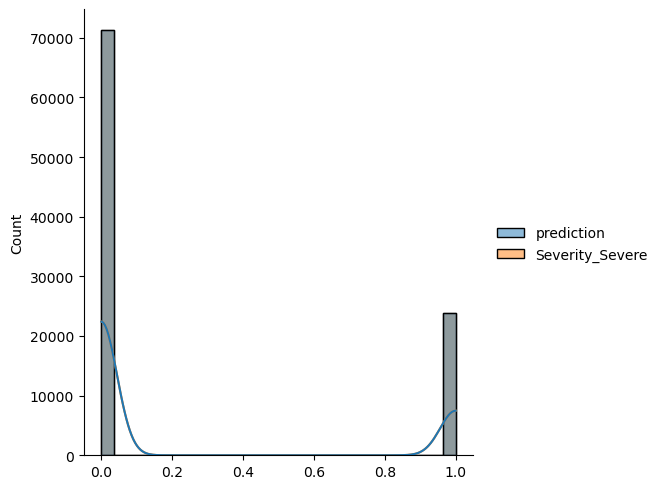

In [32]:
sns.displot(pred[['prediction', 'Severity_Severe']], kde=True)

In [34]:
# Decision Tree (Árbol de decisión)

In [35]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred_dt = model_lr.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



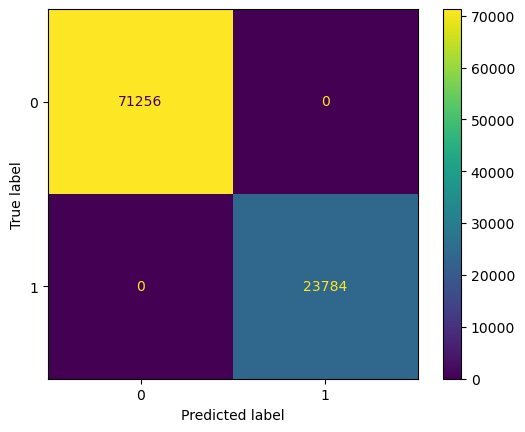

In [37]:
perform(y_pred_dt)

In [38]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



In [39]:
# Decision Tree Visualization(visualizacion del arbol de decisiones)

In [40]:
feature_names = df.columns[0:11]
viz = df.copy()
viz["Severity_Severe"]=viz["Severity_Severe"].values.astype(str)
print(viz.dtypes)
target_names = viz['Severity_Severe'].unique().tolist()

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
Age_60+                     int64
Severity_Severe            object
dtype: object


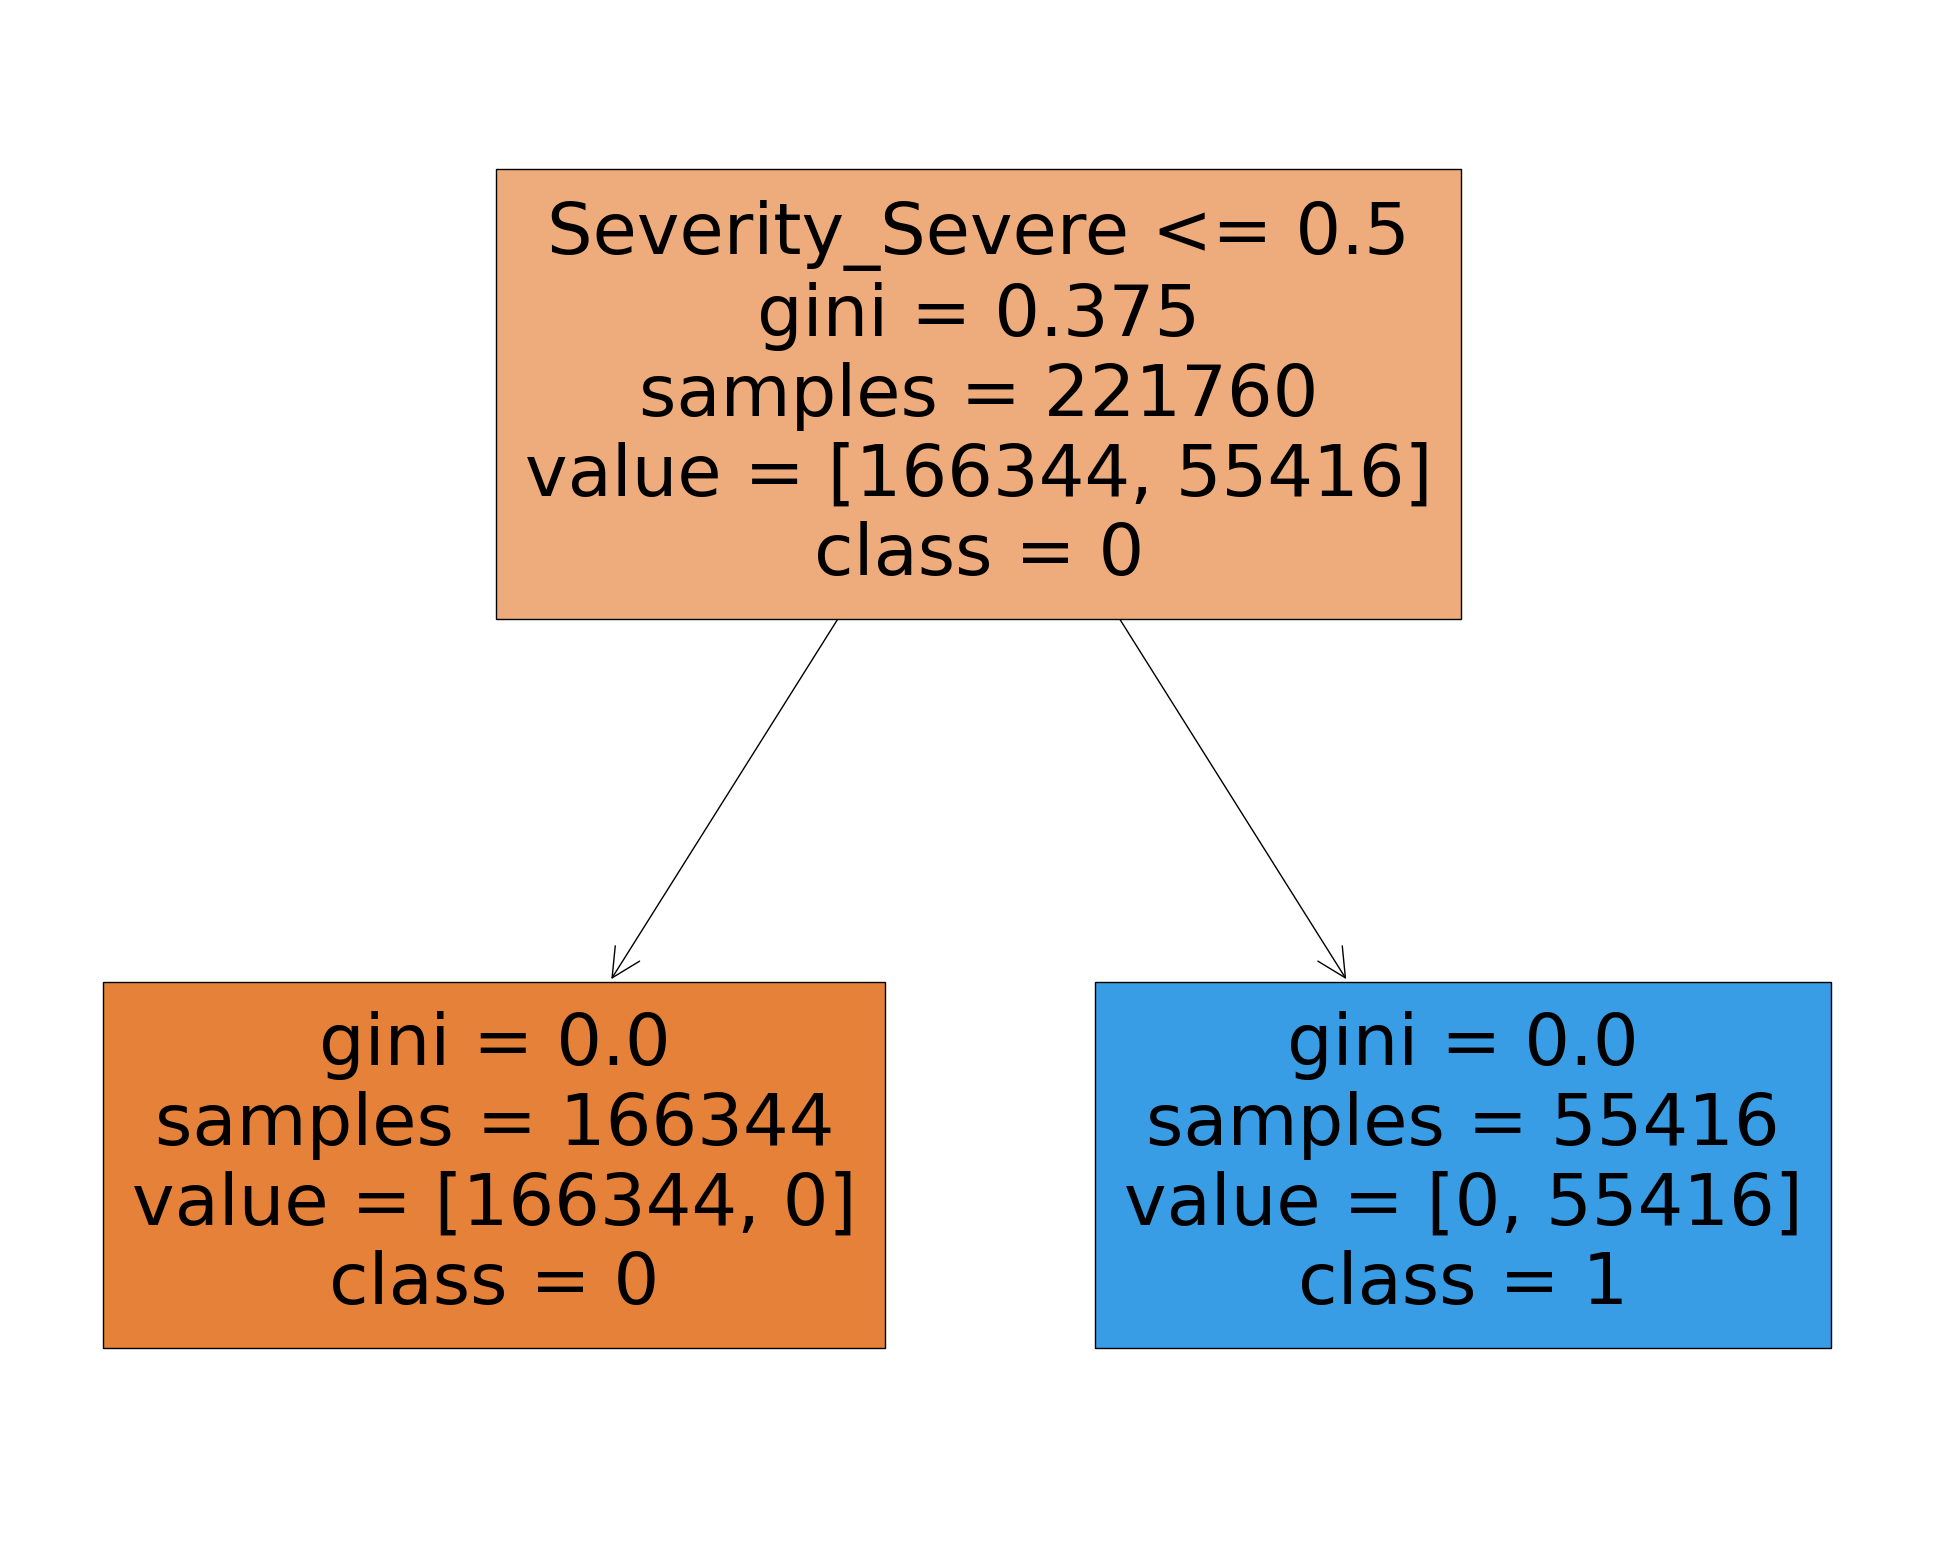

In [41]:
plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

In [42]:
# Random Forest(Bosque aleatorio)

In [43]:
model_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [44]:
y_pred_rf = model_rf.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



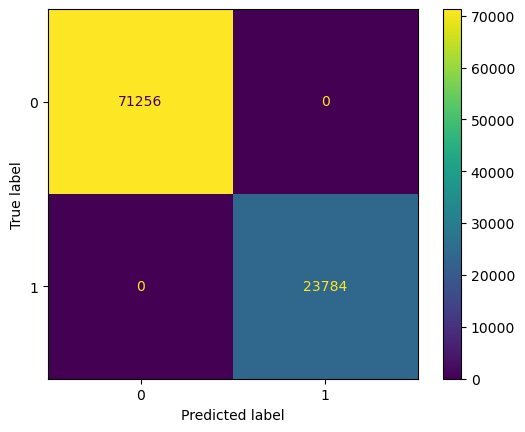

In [45]:
perform(y_pred_rf)

In [61]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



In [62]:
estimator = model_rf.estimators_[5]

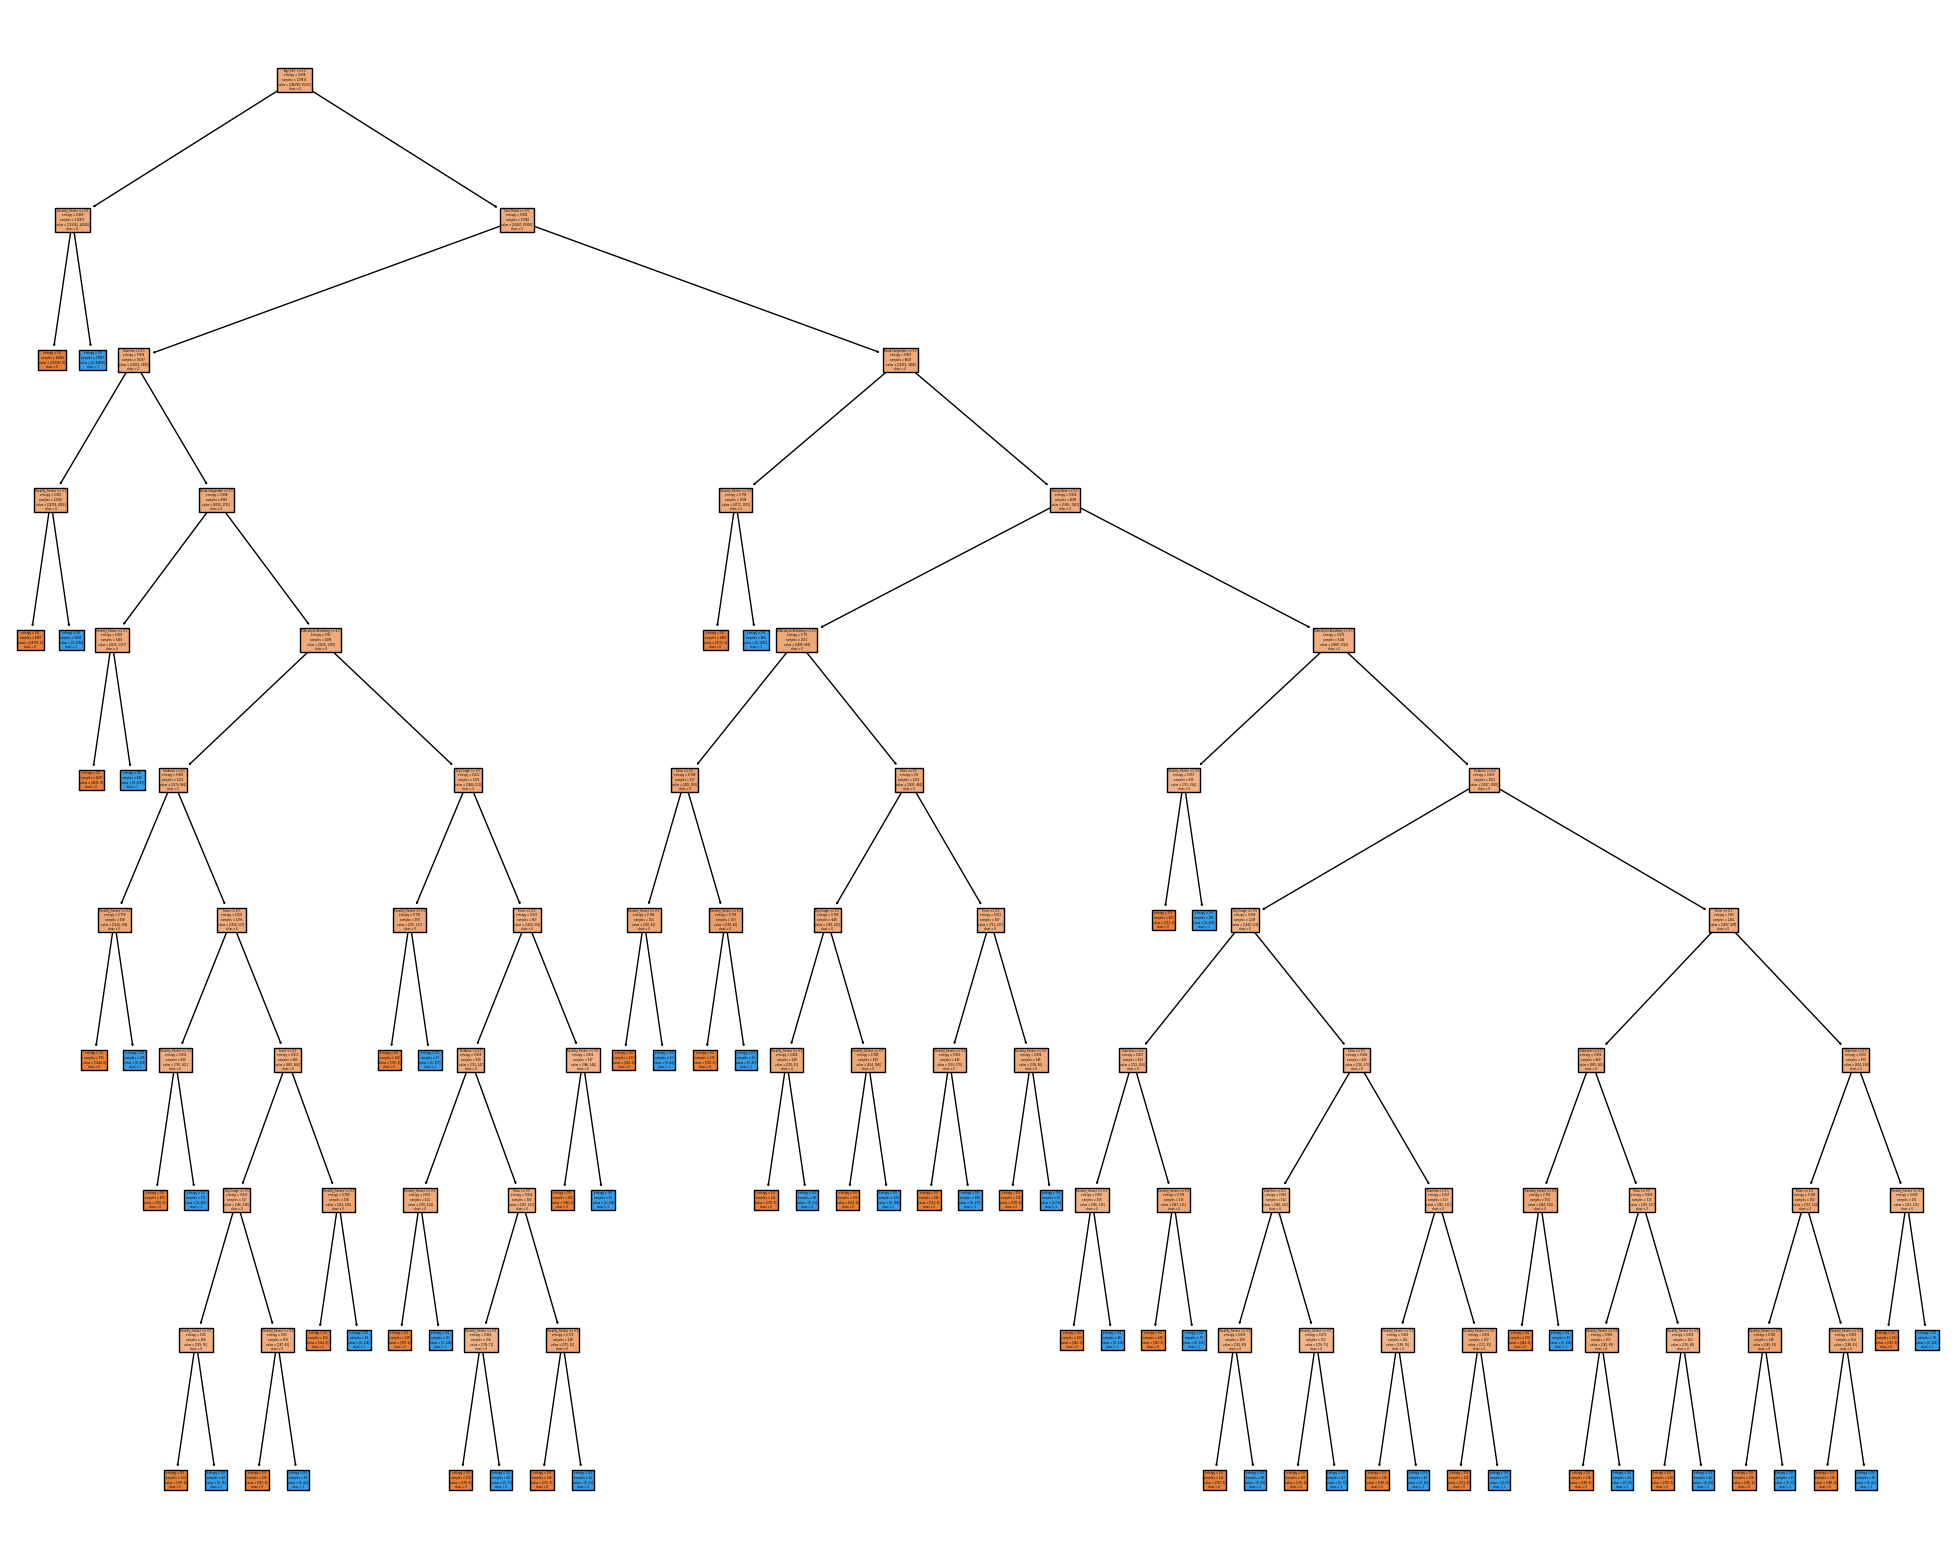

In [63]:
plt.figure(figsize=(25, 20))
plot_tree(estimator, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('random_forest_visualization.png')

In [64]:
# SVM

In [65]:
classifier_svm = svm.SVC(kernel = 'linear')
classifier_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [66]:
y_pred_svm = classifier_svm.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



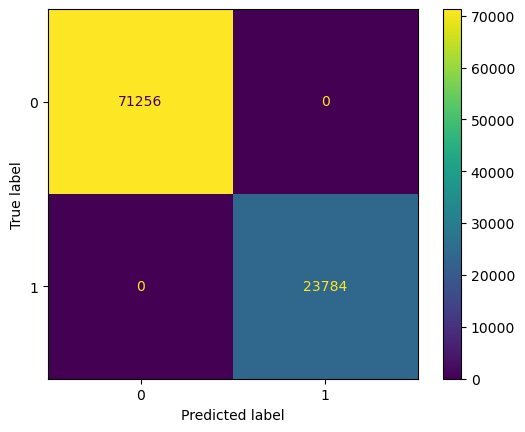

In [67]:
perform(y_pred_svm)

In [68]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



In [88]:
# ejercicio 2 KNN

In [89]:
# K-Nearest Neighbors (K-Vecinas más cercanas y K-Vecinos más cercanos)

In [74]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [69]:
scores = {}
slist = []

for i in range(1,5):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(x_train, y_train)
    y_pred_knn = model_knn.predict(x_test)
    scores[i] = accuracy_score(y_test, y_pred_knn)
    slist.append(accuracy_score(y_test, y_pred_knn))

scores

/Users/fabianagudelo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/fabianagudelo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}

In [70]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
y_pred_knn = model_knn.predict(x_test)

/Users/fabianagudelo/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



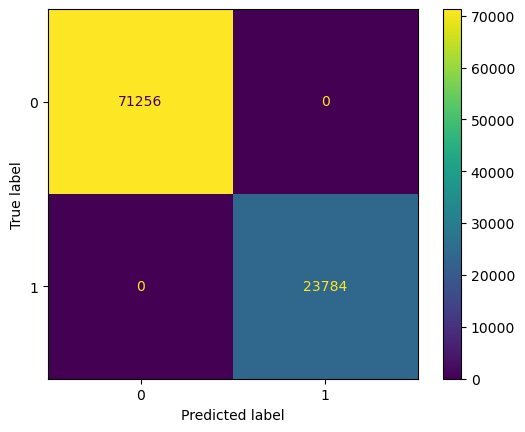

In [72]:
perform(y_pred_knn)

In [73]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



In [75]:
# Gaussian Naive Bayes (Bayesiano ingenuo gaussiano)

In [76]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [77]:
y_pred_nb = model_nb.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



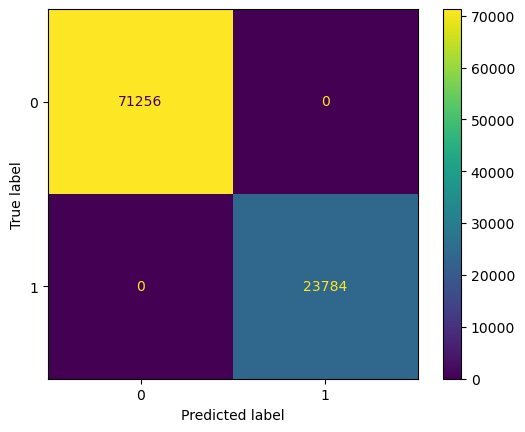

In [78]:
perform(y_pred_nb)

In [79]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040



In [80]:
# Multinomial Naive Bayes()

In [81]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [82]:
y_pred_mnb = model_mnb.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71256     0]
 [    0 23784]] 



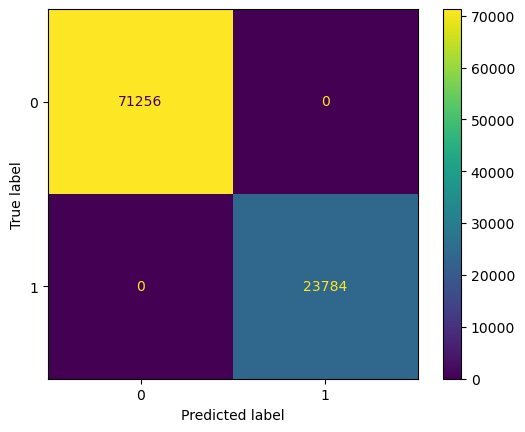

In [83]:
perform(y_pred_mnb)

In [84]:
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71256
           1       1.00      1.00      1.00     23784

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040

